# Assignment: Linear Models
## Do three questions - chosen: Q1, Q6, Q8.
### `! git clone https://github.com/ds4e/linearModels`

---

**Q1.** Please answer the following questions in your own words.

<br>

1. What makes a model "linear"? "Linear" in what?

A model is "linear" if its prediction is based on a straight-line relationship between the input and the output. "Linear" means that if you change an input by a certain amount, the output changes by a constant multiple of that amount, no matter how many times we change the input or how big the change is. A model is "linear" in the way that the predictive line is represented by a linear equation: y=mx+b, with x as the input and y as the predicted output.

<br>

2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.)

When we have a dummy variable, its coefficient tells you how much the prediction changes. For example,  for categories the dummy variables are 0 (baseline category) and 1 (a specific category exists). The "trick" in this question is that there are two ways to interpret the coefficient for a dummy variable: if we include an intercept in our model, the coefficient shows the difference from the baseline category, but if we remove the intercept from our model, the coefficient shows the absolute value for that category instead.

<br>

3. Can linear regression be used for classification? Explain why, or why not.

I don't think linear regression can or should be used for classification. This is because regression is used to predict continuous values and not categories like we have with classification. If we use linear regression for classification, we would have to round our predictions to fit into specfic categories, which isn’t ideal.

<br>

4. What are signs that your linear model is over-fitting?

1) if we have a really high R² on our training data but one that is much lower on our testing data

2) coefficients that are super large (which means the model is too sensitive)

3) adding more data actually keeps making the model worse

<br>

5. Clearly explain multi-colinearity using the two-stage least squares technique.

Multi-collinearity is when two (or more) independent variables are very highly correlated, which means they basically are the same / have the same information. This makes it hard to know which one of these two similar variables actually cause changes in the dependent variable. With the two-stage least squares technique, we can fix multi-collinearity by first creating "new" independent variables that aren’t correlated by using instrumental variables, then using those in the final regression instead of the original similar ones.

<br>

6. How can you incorporate nonlinear relationships between your target/response/dependent/outcome variable $y$ and your features/control/response/independent variables $x$ into your analysis?

We can transform the variables (like taking the log, square, etc.), add polynomial terms like x² to represent specific curves in the relatinship better, or use interaction terms (like multiplying two variables together). We can also use non-linear models like decision trees or neural networks if the relationship between our variables is too complex.

<br>

7. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?

The intercept is the output value that the model predicts when all the independent variables are zero. The slope coefficient tells us how much the output prediction changes when we increase the independent variable by one unit. The coefficient for a dummy variable tells us how much the output prediction changes when we switch from the baseline category (0) to the specific category we are looking at (1).

---

**Q6.** Let's explore multiple linear regression in a two-variable case, to build more intuition about what is happening.

Suppose the model is
$$
\hat{y}_i = b_0 + b_1 z_{i1} + b_2 z_{i2}
$$
Assume that $z_{ij}$ is centered or de-meaned, so that $z_{ij} = x_{ij} - m_j$ where $m_j$ is the mean of variable $j$ and $x_{ij}$ is the original value of variable $j$ for observation $i$. Notice that this implies
$$
\dfrac{1}{N} \sum_{i=1}^N z_{ij} = 0
$$
which will simplify your calculations below substantially!

<br>

1. Write down the SSE for this model.

We know $SSE = \sum_{i=1}^{N} \left( y_i - \hat{y}_i \right)^2$ where the predicted value $\hat{y}_i$ is $\hat{y}_i = b_0 + b_1 z_{i1} + b_2 z_{i2}
$. Thus, if we expand this, we get: $SSE = \sum_{i=1}^{N} \left( y_i - (b_0 + b_1 z_{i1} + b_2 z_{i2}) \right)^2$.

<br>

2. Take partial derivatives with respect to $b_0$, $b_1$, and $b_2$.

Taking the partial derivative, $\frac{\partial SSE}{\partial b_0} = -2 \sum_{i=1}^{N} (y_i - b_0 - b_1 z_{i1} - b_2 z_{i2}) = 0$, so we can then rearrange to $\sum_{i=1}^{N} y_i = N b_0 + b_1 \sum_{i=1}^{N} z_{i1} + b_2 \sum_{i=1}^{N} z_{i2}$. And since we are assuming centered data, i.e. $\sum z_{ij} = 0$, so:

$$
b_0 = \frac{1}{N} \sum y_i = \bar{y}
$$

<br>

3. Verify that the average error is zero and $e \cdot z =0$ at the optimum, just as in the single linear regression case.

showing average error is zero:

$e_i = y_i - \hat{y}_i = y_i - (b_0 + b_1 z_{i1} + b_2 z_{i2})$, so summing over all observations, we have $\sum_{i=1}^{N} e_i = \sum_{i=1}^{N} (y_i - (b_0 + b_1 z_{i1} + b_2 z_{i2}))$. And since we established that $( b_0 = \bar{y})$, and $(\sum z_{i1} = \sum z_{i2} = 0)$, we get: $\sum_{i=1}^{N} e_i = 0$.

showing $e \cdot z =0$:

$\sum_{i=1}^{N} e_i z_{i1} = \sum_{i=1}^{N} (y_i - b_0 - b_1 z_{i1} - b_2 z_{i2}) z_{i1}$, so after expansion, we have: $\sum_{i=1}^{N} y_i z_{i1} - b_0 \sum_{i=1}^{N} z_{i1} - b_1 \sum_{i=1}^{N} z_{i1}^2 - b_2 \sum_{i=1}^{N} z_{i1} z_{i2} = 0$. And since $( \sum z_{i1} = 0 \)$, we get: $\sum_{i=1}^{N} y_i z_{i1} = b_1 \sum_{i=1}^{N} z_{i1}^2 + b_2 \sum_{i=1}^{N} z_{i1} z_{i2}$. Similarly, for $( z_{i2} \)$: $\sum_{i=1}^{N} y_i z_{i2} = b_1 \sum_{i=1}^{N} z_{i1} z_{i2} + b_2 \sum_{i=1}^{N} z_{i2}^2$ so errors are orthogonal to predictors and thus $e \cdot z =0$.

<br>

4. Show that the optimal intercept is $b_0^* = \bar{y}$. Eliminate $b_0^*$ from the remaining equations, and focus on $b_1$ and $b_2$.

For $b_1$: $\sum_{i=1}^{N} z_{i1} y_i = b_1 \sum_{i=1}^{N} z_{i1}^2 + b_2 \sum_{i=1}^{N} z_{i1} z_{i2}$

For $b_2$: $\sum_{i=1}^{N} z_{i2} y_i = b_1 \sum_{i=1}^{N} z_{i1} z_{i2} + b_2 \sum_{i=1}^{N} z_{i2}^2$

<br>

5. Write your results as a matrix equation in the form "$Ab=C$". These are called the **normal equations**.

$$
\begin{bmatrix}
\sum z_{i1}^2 & \sum z_{i1} z_{i2} \\
\sum z_{i1} z_{i2} & \sum z_{i2}^2
\end{bmatrix}
\begin{bmatrix}
 b_1 \\
 b_2
\end{bmatrix}
=
\begin{bmatrix}
\sum z_{i1} y_i \\
\sum z_{i2} y_i
\end{bmatrix}
$$

<br>

6. Divide both sides by $N$ and substitute $z_{ij} = x_{ij} - m_j$ back into your normal equations for $x_{ij}$. What is the matrix $A$? What is the vector $C$? Explain the intuition of your discovery.

$$
A = \begin{bmatrix}
\text{Var}(X_1) & \text{Cov}(X_1, X_2) \\
\text{Cov}(X_1, X_2) & \text{Var}(X_2)
\end{bmatrix},
\quad
C = \begin{bmatrix}
\text{Cov}(X_1, Y) \\
\text{Cov}(X_2, Y)
\end{bmatrix}
$$

Intuition: The matrix A describes how the independent variables relate to each other. The vector C describes how they relate to y. Solving Ab=C finds the best-fit coefficients using covariances and variances.

---

**Q8.**
1. Find a dataset on a topic you're interested in. Some easy options are data.gov, kaggle.com, and data.world.

My dataset is 'historical_nfl_scores.csv' from kaggle.

<br>

2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving historical_nfl_scores.csv to historical_nfl_scores.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("historical_nfl_scores.csv")

In [8]:
df.head()

,Date,DOW,WT,LT,WTS,LTS,Type,Season,Point_Differential,Total_Points
0,1926-09-19,Sun,Chicago Bears,Milwaukee Badgers,10.0,7.0,Regular Season,1926,3.0,17.0
1,1926-09-19,Sun,Chicago Cardinals,Columbus Tigers,14.0,0.0,Regular Season,1926,14.0,14.0
2,1926-09-19,Sun,Green Bay Packers,Detroit Panthers,21.0,0.0,Regular Season,1926,21.0,21.0
3,1926-09-19,Sun,Duluth Eskimos,Kansas City Cowboys,7.0,0.0,Regular Season,1926,7.0,7.0
4,1926-09-25,Sat,Frankford Yellow Jackets,Akron Indians,6.0,6.0,Regular Season,1926,0.0,12.0


Winning and Losing Scores by Season:

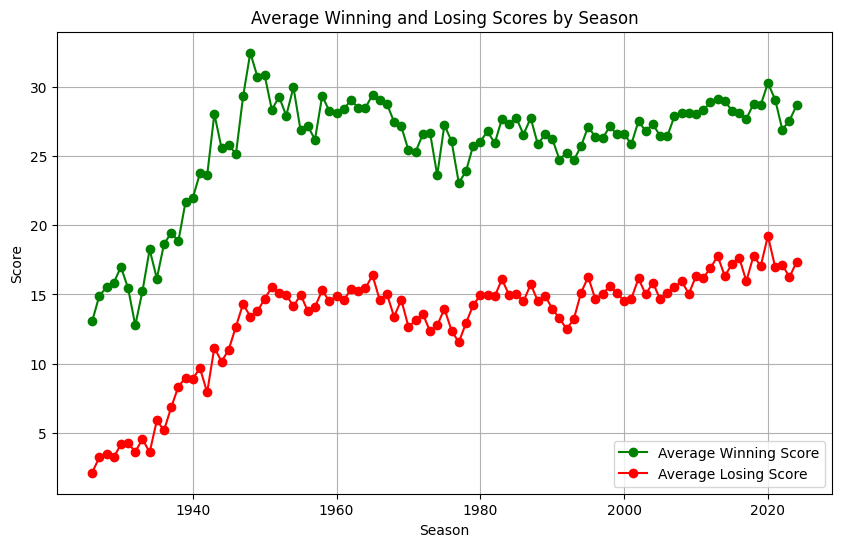

In [3]:
avg_scores = df.groupby('Season')[['WTS', 'LTS']].mean() # extract the data from the file

plt.figure(figsize=(10,6)) # define graph and set size
plt.plot(avg_scores.index, avg_scores['WTS'], label='Average Winning Score', marker='o', color='g') # plot the average winning scores
plt.plot(avg_scores.index, avg_scores['LTS'], label='Average Losing Score', marker='o', color='r') # plot the average loosing scores
plt.xlabel('Season') # print the X axis label
plt.ylabel('Score') # print the Y axis label
plt.title('Average Winning and Losing Scores by Season') # print the graphs title
plt.legend() # create a key to the graph
plt.grid(True) # turn on grid for graph
plt.show() # display the graph

Average Point Differential by Season:

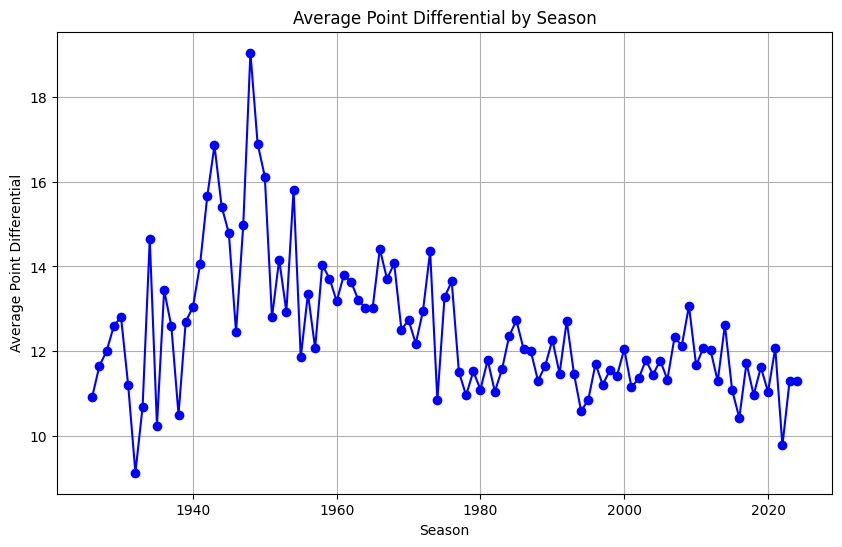

In [4]:
df['Point_Differential'] = df['WTS'] - df['LTS'] # create a column containing point differentials (winning score - loosing score)
avg_point_differential = df.groupby('Season')['Point_Differential'].mean() # get the average of the point differential column by season

plt.figure(figsize=(10, 6)) # define graph and set size
plt.plot(avg_point_differential.index, avg_point_differential.values, label='Average Point Differential', marker='o', color='b') # plot the data
plt.xlabel('Season') # title the X axis
plt.ylabel('Average Point Differential') # title the Y axis
plt.title('Average Point Differential by Season') # title the graph
plt.grid(True) # enable grid
plt.show() # display graph

Average Points per Game by Season:

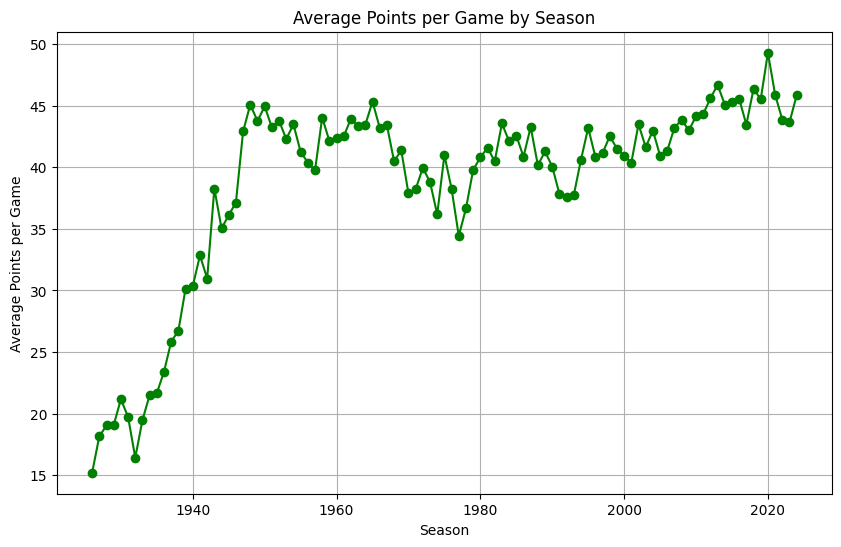

In [6]:
df['Total_Points'] = df['WTS'] + df['LTS'] # create a column for total points in a game

combined_points = df.groupby('Season')['Total_Points'].sum() # calculate sum of total points for each year
games_per_year = df.groupby('Season').size() # count the number of games each season
avg_points_per_game = combined_points / games_per_year # calculate average points per game for each season

plt.figure(figsize=(10, 6)) # define plot
plt.plot(avg_points_per_game.index, avg_points_per_game.values, marker='o', color='g') # plot data
plt.xlabel('Season') # Label X axis
plt.ylabel('Average Points per Game') # label Y axis
plt.title('Average Points per Game by Season') # title graph
plt.grid(True) # turn on plots
plt.show() # display graph

<br>

3. Split the sample into an ~80% training set and a ~20% test set.
4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the SSE on the test set.
5. Which model performed the best, and why?

In [17]:
# we are using winning scores vs season (part of first graph above in part 2):

import numpy as np  # for calculations
from sklearn.model_selection import train_test_split  # for splitting data
from sklearn.linear_model import LinearRegression  # for regression
from sklearn.metrics import mean_squared_error  # for error calculation

df = df.dropna(subset=['WTS'])

x = df[['Season']]  # predictor: season
y = df['WTS']  # target: winning scores

# split the data into training (80%) and test (20%) sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# create and train the first model (simple linear regression)
model1 = LinearRegression()  # initialize model
model1.fit(x_train, y_train)  # train model on training data

# make predictions on test set
y_pred1 = model1.predict(x_test)

# calculate sse for model1
sse1 = np.sum((y_test - y_pred1) ** 2)  # sum of squared errors
print("sse for model1:", sse1)

# try another regression with a polynomial term (quadratic)
x_train['season_squared'] = x_train['Season'] ** 2  # create new feature
x_test['season_squared'] = x_test['Season'] ** 2  # apply to test set

# train second model with season and season_squared as predictors
model2 = LinearRegression()
model2.fit(x_train, y_train)

# make predictions
y_pred2 = model2.predict(x_test)

# calculate sse for model2
sse2 = np.sum((y_test - y_pred2) ** 2)
print("sse for model2:", sse2)

# compare the models
if sse1 < sse2:
    print("model1 performed better (lower sse)")
else:
    print("model2 performed better (lower sse)")

sse for model1: 304958.3521230927
sse for model2: 301411.13893323124
model2 performed better (lower sse)


<br>

6. What did you learn?

Since model 2 performed better, this means a quadratic pattern fits the relationship of winning scores (y) vs season (x) better. We could also add more predictors (like losing scores or average score differential) to improve the accuracy of our predictions.